In [ ]:
# Imports 

[Text Analytic](https://www.lexalytics.com/lexablog/text-analytics-functions-explained)

    1. Language Identification
    2. Tokenization
    3. Sentence Breaking
    4. Part of Speech Tagging
    5. Chunking
    6. Syntax Parsing
    7. Sentence Chaining

In [1]:
# Get data intext and save as csv
file = open('../data/ongoing_fictions.txt', 'r')

# Get book info 
columns = ['title', 'tags', 'followers', 'rating', 'pages', 'views', 'chapters', 'date_last_updated']
books = []
other = []

# Add columsn to book list
books.append(columns)

# Get books 
for line in file:
    info = line.split(';')
    
    if len(info) == 8:
        info[1] = info[1].replace('|', ' ').replace('/ ', '') # Tags 
        info[2] = info[2].strip(' FOLLOWERS').replace(',', '') # Followers 
        info[4] = info[4].strip(' PAGES').replace(',', '')  # Pages 
        info[5] = info[5].strip(' VIEWS').replace(',', '')  # Views 
        info[6] = info[6].strip(' CHAPTERS').replace(',', '')  # Chapters 
        info[7] = info[7].strip('\n').replace(',', '') # date last updated 
        
        books.append(info)
    else: other.append(line)

file.close()

print(f'Size of -> books: {len(books)}, other: {len(other)}')

Size of -> books: 2440, other: 144


In [2]:
books

[['title',
  'tags',
  'followers',
  'rating',
  'pages',
  'views',
  'chapters',
  'date_last_updated'],
 ['Beware Of Chicken',
  'Adventure Comedy Fantasy Romance Male Lead Martial Arts Portal Fantasy Isekai Reincarnation Xianxia ',
  '13806',
  '4.83',
  '476',
  '2623581',
  '68',
  'MARCH 29 2021'],
 ['The Perfect Run',
  'Adventure Comedy Mystery Sci-fi Anti-Hero Lead Genetically Engineered Loop Male Lead Strong Lead Super Heroes Time Travel ',
  '8613',
  '4.79',
  '791',
  '1421991',
  '68',
  'MARCH 27 2021'],
 ['Kairos: A Greek Myth LitRPG',
  'Action Adventure Fantasy Anti-Hero Lead High Fantasy LitRPG Male Lead Mythos Progression Ruling Class Strategy ',
  '3042',
  '4.82',
  '157',
  '92442',
  '12',
  'MARCH 27 2021'],
 ['Vigor Mortis',
  'Adventure Fantasy Horror Female Lead High Fantasy Magic Progression ',
  '4931',
  '4.78',
  '380',
  '376463',
  '35',
  'MARCH 29 2021'],
 ['A Journey of Black and Red',
  'Action Adventure Fantasy Historical Female Lead Urban Fanta

In [3]:
# Fix problems in other chapters 
failed = []
for o in other:
    info = o.split(';')[0:8]
    info2 = o.split(';')[8:]
    
    try:
        # Add title
        info2.insert(0, info[7].split('2021')[1])

        # add date
        info[7] = info[7].split('2021')[0] + '2021'
        
        # Clean Data 
        info[1] = info[1].replace('|', ' ').replace('/ ', '') # Tags 
        info[2] = info[2].strip(' FOLLOWERS').replace(',', '') # Followers 
        info[4] = info[4].strip(' PAGES').replace(',', '')  # Pages 
        info[5] = info[5].strip(' VIEWS').replace(',', '')  # Views 
        info[6] = info[6].strip(' CHAPTERS').replace(',', '')  # Chapters 
        info[7] = info[7].strip('\n').replace(',', '') # date last updated 
        
        
        info2[1] = info2[1].replace('|', ' ').replace('/ ', '') # Tags 
        info2[2] = info2[2].strip(' FOLLOWERS').replace(',', '') # Followers 
        info2[4] = info2[4].strip(' PAGES').replace(',', '')  # Pages 
        info2[5] = info2[5].strip(' VIEWS').replace(',', '')  # Views 
        info2[6] = info2[6].strip(' CHAPTERS').replace(',', '')  # Chapters 
        info2[7] = info2[7].strip('\n').replace(',', '') # date last updated 
        
        books.append(info)
        books.append(info2)
    except:
        failed.append(o)

print(f'Size of -> books: {len(books)}, failed: {len(failed)}')

Size of -> books: 2710, failed: 9


In [4]:
for f in failed:
    x = f.split(';')
    info = [None, None, None, None, None, None, None, None]
    
    info[0] = x[0] + x[1]
    info[1] = x[2].replace('|', ' ').replace('/ ', '') # Tags 
    info[2] = x[3].strip(' FOLLOWERS').replace(',', '') # Followers 
    info[3] = x[4]
    info[4] = x[5].strip(' PAGES').replace(',', '')  # Pages 
    info[5] = x[6].strip(' VIEWS').replace(',', '')  # Views 
    info[6] = x[7].strip(' CHAPTERS').replace(',', '')  # Chapters 
    info[7] = x[8].strip('\n').replace(',', '') # date last updated 
    
    books.append(info)

print(f'Size of -> books: {len(books)}, failed: {len(failed)}')

Size of -> books: 2719, failed: 9


In [5]:
# Fix error with book at index 2501 

'''
for i, b in enumerate(books):
    if len(b) != 8:
        print(i, b)
'''
x = books[2501]
info = [None, None, None, None, None, None, None, None]

info[0] = x[0] + x[1]
info[1] = x[2].replace('|', ' ').replace('/ ', '') # Tags 
info[2] = x[3].strip(' FOLLOWERS').replace(',', '') # Followers 
info[3] = x[4]
info[4] = x[5].strip(' PAGES').replace(',', '')  # Pages 
info[5] = x[6].strip(' VIEWS').replace(',', '')  # Views 
info[6] = x[7].strip(' CHAPTERS').replace(',', '')  # Chapters 
info[7] = x[8].strip('\n').replace(',', '') # date last updated 

books[2501] = info

# Explore the Data 

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import nltk_helper as local_nltk


%matplotlib inline

plt.style.use('seaborn')

In [7]:
# Make books into dataframe 
df = pd.DataFrame(data = books[1:], columns = books[0])
df.head()

,title,tags,followers,rating,pages,views,chapters,date_last_updated
0,Beware Of Chicken,Adventure Comedy Fantasy Romance Male Lead Mar...,13806,4.83,476,2623581,68,MARCH 29 2021
1,The Perfect Run,Adventure Comedy Mystery Sci-fi Anti-Hero Lead...,8613,4.79,791,1421991,68,MARCH 27 2021
2,Kairos: A Greek Myth LitRPG,Action Adventure Fantasy Anti-Hero Lead High F...,3042,4.82,157,92442,12,MARCH 27 2021
3,Vigor Mortis,Adventure Fantasy Horror Female Lead High Fant...,4931,4.78,380,376463,35,MARCH 29 2021
4,A Journey of Black and Red,Action Adventure Fantasy Historical Female Lea...,6420,4.73,2006,1608082,107,MARCH 26 2021


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              2718 non-null   object
 1   tags               2718 non-null   object
 2   followers          2718 non-null   object
 3   rating             2718 non-null   object
 4   pages              2718 non-null   object
 5   views              2718 non-null   object
 6   chapters           2718 non-null   object
 7   date_last_updated  2718 non-null   object
dtypes: object(8)
memory usage: 170.0+ KB


In [9]:
df.describe()

,title,tags,followers,rating,pages,views,chapters,date_last_updated
count,2718,2718,2718,2718,2718,2718,2718,2718
unique,2592,2570,609,201,804,1895,236,37
top,God Realms Online,Short Story,0,0,12,22,1,MARCH 29 2021
freq,2,6,265,782,42,16,235,347


In [10]:
# Fix columns data types
df['date_last_updated'] = pd.to_datetime(df.date_last_updated)
df['followers'] = pd.to_numeric(df.followers)
df['rating'] = pd.to_numeric(df.rating)
df['chapters'] = pd.to_numeric(df.chapters)
df['views'] = pd.to_numeric(df.views)
df['pages'] = pd.to_numeric(df.pages)

In [11]:
# Check for dubpicate and remove them 
df = df[~df.duplicated()]

In [12]:
### Exlore the Tags Column
tag_dic = dict()

for tag in df.tags:
    tag = tag.lower()
    for t in tag.split(' '):
        if t not in tag_dic:
            tag_dic[t] = 0
        tag_dic[t] += 1

discardable = ['Arts', 'Portal', '', 'Heroes', 'Travel', 'Ruling', 'Characters', 'lead', 'Reality', 'MC', 'Identity'
'Military', 'of', 'and', 'Intelligence', 'Post', 'Gender', 'Space', 'First', 'Reader', 'Story', 'Lead']

In [13]:
# Sort dictionary 
tag_dic = dict(sorted(tag_dic.items(), key=lambda item: item[1], reverse=True))
# Get only useful tags and remove labels and values 
keys = []
values = []
for key, value in tag_dic.items():
    if key not in discardable:
        keys.append(key)
        values.append(value)

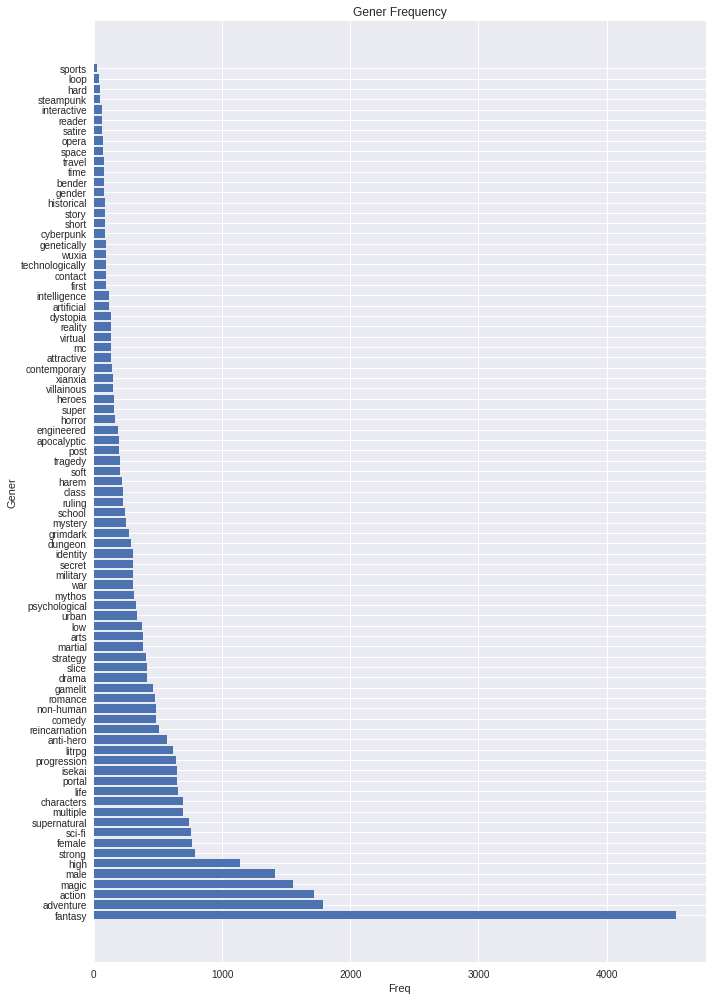

In [14]:
fig, ax = plt.subplots(figsize = (10, 14))

ax.barh(y = keys, width = values)
ax.set_ylabel('Gener')
ax.set_xlabel('Freq')
ax.set_title('Gener Frequency')
plt.tight_layout()

In [15]:
# Copy data frame
df_copy = df.copy()

In [16]:
# Make Tags into words list
def tags_to_words_lst(x):
    tags = x.lower()
    
    n_list = []
    for tag in tags.split(' '):
        if tag in keys: 
            n_list.append(tag)
            

    return n_list
    
            

df['tags'] = df.tags.apply(lambda x:  tags_to_words_lst(x))
df.head()

,title,tags,followers,rating,pages,views,chapters,date_last_updated
0,Beware Of Chicken,"[adventure, comedy, fantasy, romance, male, ma...",13806,4.83,476,2623581,68,2021-03-29
1,The Perfect Run,"[adventure, comedy, mystery, sci-fi, anti-hero...",8613,4.79,791,1421991,68,2021-03-27
2,Kairos: A Greek Myth LitRPG,"[action, adventure, fantasy, anti-hero, high, ...",3042,4.82,157,92442,12,2021-03-27
3,Vigor Mortis,"[adventure, fantasy, horror, female, high, fan...",4931,4.78,380,376463,35,2021-03-29
4,A Journey of Black and Red,"[action, adventure, fantasy, historical, femal...",6420,4.73,2006,1608082,107,2021-03-26


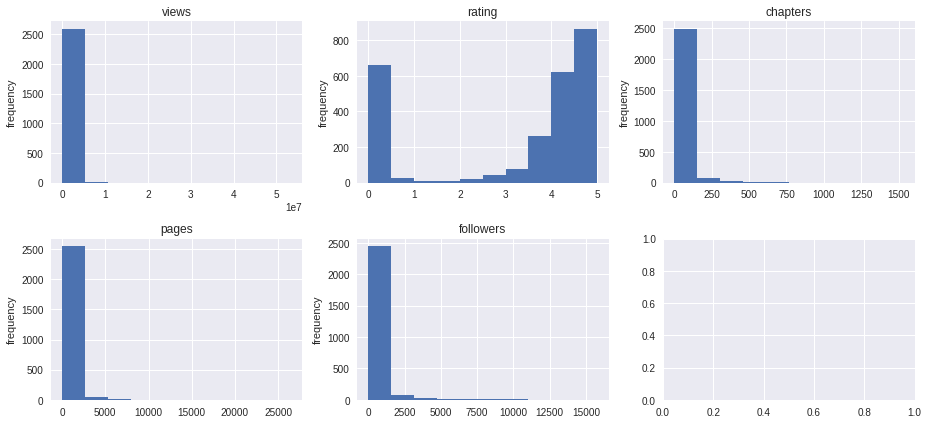

In [18]:
# Explore nnumerical data 
fig, axs = plt.subplots(2, 3, figsize = (13, 6))

numeric_column=['views', 'rating', 'chapters', 'pages', 'followers']

for i, ax in enumerate(axs.flatten()):
    ax.hist(x = df[numeric_column[i]])
    #ax.set_xlabel(column[i])
    ax.set_ylabel('frequency')
    ax.set_title(numeric_column[i])
    if i == 4: break
fig.tight_layout()

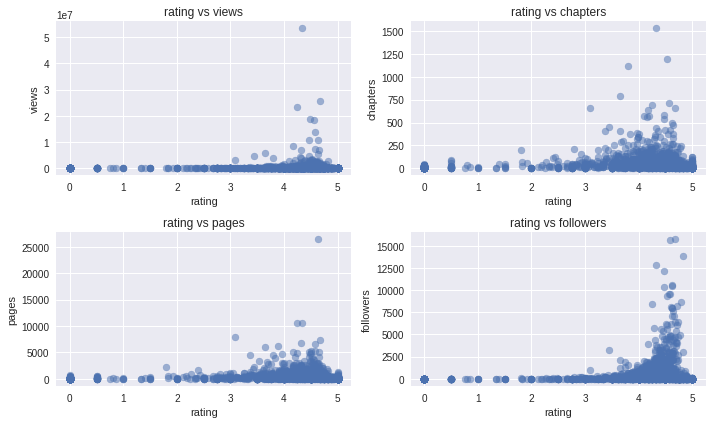

In [22]:
# Explore numeric variables by rating 
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

# columns 
column=['views', 'chapters', 'pages', 'followers']

for i, ax in enumerate(axs.flatten()):
    ax.scatter(x = df['rating'] , y = df[column[i]], alpha = 0.5)
    ax.set_title(f'rating vs {column[i]}')
    ax.set_xlabel('rating')
    ax.set_ylabel(column[i])

plt.tight_layout()